In [1]:
import dicom
from os import path
import pydicom

/Users/fonturacetamum/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [18]:
from matplotlib import pyplot as plt
plt.set_cmap("gray")

%matplotlib inline

In [ ]:
TAKE:
    387719 MRI (CT?)
    387098 MRI
    386800 MRI
    386662 MRI (shift)

DROP:  
  387098

In [ ]:
!ls ../data/387098/

In [208]:
current_id = "387295"

plan = dicom.read_file("../data/{}/RS.{}.MR_1.dcm".format(current_id, current_id))

uid_contour_dict = dict()
for roi in plan.ROIContourSequence:
    for contour in roi.get("ContourSequence", []):
        assert len(contour.ContourImageSequence) == 1
        cur_uid = contour.ContourImageSequence[0].ReferencedSOPInstanceUID
        uid_contour_dict[cur_uid] = contour.ContourData

PREFIX = "../data/{}/".format(current_id)
filenames = !ls $PREFIX

uid_filename_dict = dict()
for filename in filenames:
    dicom_image = dicom.read_file(path.join(PREFIX, filename))
    uid_filename_dict[dicom_image.SOPInstanceUID] = filename

In [209]:
uid_contour_dict.keys()

dict_keys(['1.3.12.2.1107.5.2.36.60016.30000017053107275840000005958', '1.3.12.2.1107.5.2.36.60016.30000017053107275840000005959', '1.3.12.2.1107.5.2.36.60016.30000017053107275840000005947', '1.3.12.2.1107.5.2.36.60016.30000017053107275840000005948', '1.3.12.2.1107.5.2.36.60016.30000017053107275840000005949', '1.3.12.2.1107.5.2.36.60016.30000017053107275840000005950', '1.3.12.2.1107.5.2.36.60016.30000017053107275840000005951', '1.3.12.2.1107.5.2.36.60016.30000017053107275840000005952', '1.3.12.2.1107.5.2.36.60016.30000017053107275840000005953'])

In [210]:
def slice_loc_safe(img):
    try:
        return -img.SliceLocation
    except AttributeError:
        return 1000000

mr_image_filenames = [v for v in uid_filename_dict.values() if "MR" in v]
mr_images = [dicom.read_file(path.join(PREFIX, f)) for f in mr_image_filenames]
mr_images = sorted(mr_images, key=slice_loc_safe)

In [170]:
ct_image_filenames = [v for v in uid_filename_dict.values() if "CT" in v and "0001" not in v]
ct_images = [dicom.read_file(path.join(PREFIX, f)) for f in ct_image_filenames]
ct_images = sorted(ct_images, key=slice_loc_safe)

In [193]:
[img.SOPInstanceUID for img in ct_images if img.SOPInstanceUID in uid_contour_dict]

['1.3.12.2.1107.5.1.4.64713.30000017060806450296200004433',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004434',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004435',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004436',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004437',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004438',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004439',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004440',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004441',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004424',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004442',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004443',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004444',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004445',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004446',
 '1.3.12.2.1107.5.1.4.64713.30000017060806450296200004447',
 '1.3.12.2.1107.5.1.4.64713.300000170608

In [148]:
IDX = 0

In [16]:
import numpy as np
from skimage import exposure

In [84]:
IDX = 55

In [96]:
len(ct_images)

171

In [211]:
IDX = 0

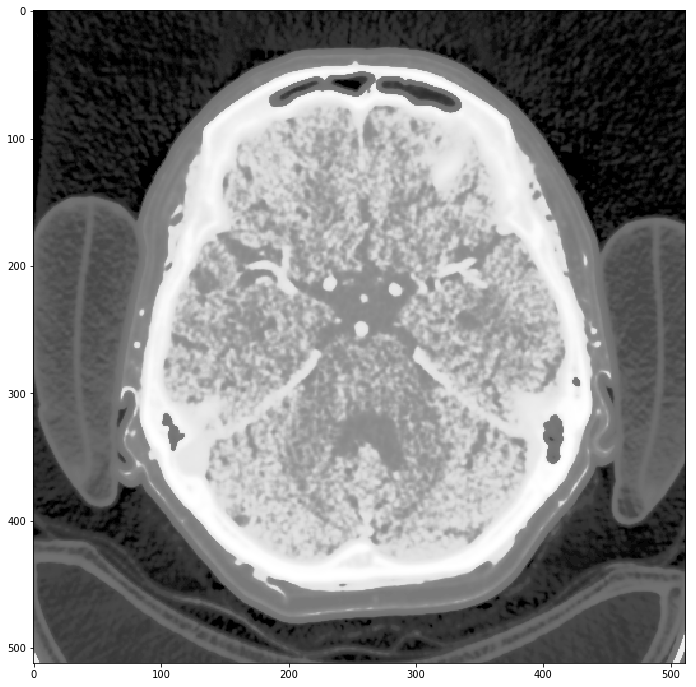

In [243]:
plt.figure(figsize=(12, 12))

images_list = ct_images

dicom_image = images_list[IDX]
scale_x = scale_y = 1
shift_x = shift_y = shift_z = 0
plt.imshow(exposure.equalize_hist(dicom_image.pixel_array))

if dicom_image.get("PixelSpacing") is None:
    print("No Pixel spacing")
    
if dicom_image.get("ImagePositionPatient") is None:
    print("No position")
    
scale_x, scale_y = dicom_image.get("PixelSpacing", [scale_x, scale_y])
shift_x, shift_y, shift_z = dicom_image.get("ImagePositionPatient", [shift_x, shift_y, shift_z])

if images_list[IDX].SOPInstanceUID in uid_contour_dict:
    contour_data = uid_contour_dict[images_list[IDX].SOPInstanceUID]

    xs = np.array(contour_data[::3]) - shift_x
    ys = np.array(contour_data[1::3]) - shift_y

    xs /= scale_x
    ys /= scale_y

    zs = contour_data[2::3]

    plt.plot(xs, ys)
IDX += 1

In [239]:
IDX

27

In [ ]:
mr_images[IDX].SOPInstanceUID

In [ ]:
IDX = 110

In [ ]:
IDX = 110

In [ ]:
dicom_image

In [ ]:
IDX = 0

In [ ]:
shift_z = 0

In [ ]:
IDX -= 5

In [ ]:
IDX = 0

In [ ]:
IDX -= 4

In [ ]:
IDX = 50

In [ ]:
IDX

In [ ]:
dicom.read_file

In [ ]:
uid_filename_dict

In [ ]:
uid_filename_dict

In [ ]:
IDX = 0

In [ ]:
plan

In [ ]:
dicom_image

In [ ]:
import numpy as np

In [ ]:
IDX = 0

In [ ]:
current_id

In [ ]:
image_name

In [ ]:
"../data/{}/{}".format(current_id, image_name)

In [ ]:
image_uid

In [ ]:
uid_filename_dict["1.3.12.2.1107.5.1.4.65763.30000017060707195877000000427"]

In [ ]:
dicom_image

In [ ]:
dicom.read_file("../data/{}/{}".format(current_id, image_name))

In [ ]:
IDX = 0

In [ ]:
"../data/{}/{}".format(current_id, image_name)

In [ ]:
dicom_images = [dicom.read_file(path.join(PREFIX, f)) for f in filenames if "CT" in f]

In [ ]:
dicom_image.ImagePositionPatient

In [ ]:
def f(img):
    try:
#         print(img.ImagePositionPatient)
        return img.SliceLocation
    except AttributeError:
        return -1000000
d_i_sorted = sorted(dicom_images, key=f, reverse=True)

In [ ]:
new_arr = np.array(d_i_sorted[48].pixel_array / d_i_sorted[48].pixel_array.max(), dtype=np.float32)

In [ ]:
from skimage import exposure

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(exposure.equalize_hist(new_arr))

In [ ]:
image_name

In [ ]:
image_uid = images_of_interest[IDX]
image_name = uid_filename_dict[image_uid]
dicom_image = dicom.read_file("../data/{}/{}".format(current_id, image_name))
image = dicom_image.pixel_array
plt.figure(figsize=(12, 12))
plt.imshow(exposure.equalize_hist(image))

contour_data = uid_contour_dict[image_uid]
scale_x, scale_y = dicom_image.PixelSpacing
shift_x, shift_y, _ = dicom_image.ImagePositionPatient
xs = np.array(contour_data[::3]) - shift_x
ys = np.array(contour_data[1::3]) - shift_y

xs /= scale_x
ys /= scale_y

zs = contour_data[2::3]

plt.plot(xs, ys)

IDX += 1

In [ ]:
seq = plan.ROIContourSequence[0]

In [ ]:
seq.RefdROINumber

In [ ]:
seq = plan.StructureSetROISequence[0]

In [ ]:
seq.ReferencedFrameOfReferenceUID

In [ ]:
one_image.ROIContourSequence[0]

In [ ]:
seq = one_image.ROIContourSequence[1]

In [ ]:
seq.keys()

In [ ]:
contour_data = seq.ContourSequence[0].ContourData

In [ ]:
plt.plot(xs, ys)

In [ ]:
plt.figure(figsize=(12, 12))
plt.set_cmap("gray")
plt.imshow(one_image.pixel_array)